In [1]:
import sys
sys.path.append('../..')

import math
import matplotlib.pyplot as plt
import numpy as np

import navbench as nb
import navbench.improc as ip
from navbench.infomax import InfoMax

IM_SIZE = (90, 25)
RIDF_STEP = 1
RESIZE     = ip.resize(*IM_SIZE)
PREPROC    = (RESIZE) #, ip.remove_sky_and_histeq)
SNAP_STEP  = 10
NUM_HIDDEN = IM_SIZE[0] * IM_SIZE[1]
INFOMAX_RANDOM_SEED = 42
INFOMAX_LEARNING_RATE = InfoMax.DEFAULT_LEARNING_RATE
DBROOT = '../../datasets/rc_car/Stanmer_park_dataset'

names = ['0511/unwrapped_dataset%d' % num for num in range(1, 6)]
descriptions = ['0 m away', '0 m away (repeat)', '1 m away (left)',
                '1 m away (right)', '2 m away (right)']
dbs = []
images = []

def plot_arrows(ax, ridf_fun):
    test_dists = range(0, 55, 3)
    for db, route_images, line in zip(dbs, images, lines):
        colour = line[0].get_color()
        head_offset = db.calculate_heading_offset(0.5)
        test_frames = [np.argmin(np.abs(db.distance - test_dist)) for test_dist in test_dists]

        heads = ridf_fun([route_images[fr] for fr in test_frames])
        heads = [head + head_offset for head in heads]
        x = [db.x[i] for i in test_frames]
        y = [db.y[i] for i in test_frames]
        u = [math.cos(head) for head in heads]
        v = [math.sin(head) for head in heads]

        ax.quiver(x, y, u, v, color=colour, zorder=10, scale_units='xy', scale=0.5)

for name in names:
    dbs.append(nb.Database(os.path.join(DBROOT, name)))
    images.append(dbs[-1].read_images(preprocess=PREPROC, to_float=False))

Loading database at ../../datasets/rc_car/Stanmer_park_dataset/0511/unwrapped_dataset1...
Database contains 411 images
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/0511/unwrapped_dataset2...
Database contains 367 images
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/0511/unwrapped_dataset3...
Database contains 402 images
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/0511/unwrapped_dataset4...
Database contains 452 images
Loading database at ../../datasets/rc_car/Stanmer_park_dataset/0511/unwrapped_dataset5...
Database contains 386 images


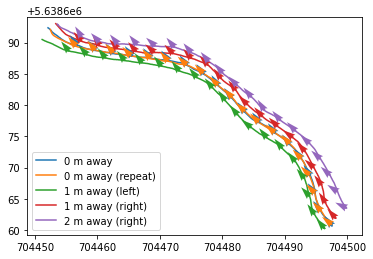

In [2]:
snapshots = images[0][0::SNAP_STEP]

_, ax = plt.subplots()
ax.axis('equal')
lines = [ax.plot(db.x, db.y) for db in dbs]
plot_arrows(ax, lambda ims: nb.get_ridf_headings(ims, snapshots, RIDF_STEP))
ax.legend(descriptions);

Using cached result from '.navbench_cache/ipython_get_trained_network_22cbf99add5a76d891003c81eea1b5af78ff076e85bc64fd50c57afd4e304bfd.pkl'
get_trained_network() took 38.1535 s to run (without caching)
Using cached result from '.navbench_cache/ipython_get_infomax_headings_b8565b23d0797d3c427ec3c6c0ea8a6359272764831c11b4d934026c88a9b465.pkl'
get_infomax_headings() took 8.55325 s to run (without caching)
Using cached result from '.navbench_cache/ipython_get_infomax_headings_c7e9caaca5114c51c323252f1d592d04ca972b9fd3fde6a9fc0ffe7a48f9c2a3.pkl'
get_infomax_headings() took 8.63612 s to run (without caching)
Using cached result from '.navbench_cache/ipython_get_infomax_headings_522229c260f756a30b4fb7e78f9b4999f97ab7c8097189e19e94d42868cafdad.pkl'
get_infomax_headings() took 8.69981 s to run (without caching)
Using cached result from '.navbench_cache/ipython_get_infomax_headings_f676124f4a6b6e28c44d3aea0115893ec31d7fb6cae298facd2be3655b67bbde.pkl'
get_infomax_headings() took 8.71932 s to run 

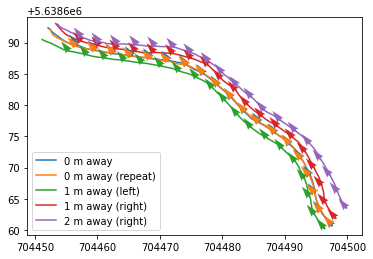

In [3]:
from navbench.infomax import *

ann = get_trained_network(images[0], INFOMAX_RANDOM_SEED, num_hidden=NUM_HIDDEN, learning_rate=INFOMAX_LEARNING_RATE)

_, ax = plt.subplots()
ax.axis('equal')
lines = [ax.plot(db.x, db.y) for db in dbs]

plot_arrows(ax, lambda im: get_infomax_headings(ann, im, RIDF_STEP))
ax.legend(descriptions);